<a href="https://colab.research.google.com/github/jacksonk7/Python-Analise-de-Dados/blob/main/Deliveable2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Coleta dos dados

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/Walmart.csv')

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
#Utilizamos o "info()"" para obtenção de uma rápida descrição dos dados, como total de linhas, número de colunas, 
#tipo de cada série e se há valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
#analisando os tipos de dados disponiveis
df.dtypes

#Limpeza dos dados

In [ ]:
#Aqui podemos avaliar a quantidade de valores nulos dentro do nosso DataFrame
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Month           0
Year            0
dtype: int64

Não foi encontrado valor nulo no dataframe

In [ ]:
#Aqui podemos identificar que não temos dados a mais ou a menos na coluna "Store"
df.nunique()

In [ ]:
#Com base na coluna "Date" conseguimos separar as informações por "Month" e "Year", será util para uma analise mais profunda futuramente.
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010


#Exploração dos dados

Vamos começar a fazer nossa analise tirando a media das principais colunas agrupadas por lojas "Store", que na nossa avaliação são: Weekly_Sales, CPI e Unemployment. 

In [ ]:
#Limpando colunas que não serão utilizadas nesta primeira analise e Achando a média do que é preciso agrupando por loja
df1 = df.drop(columns=['Date', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'Month', 'Year']
              ).groupby('Store').mean(
              ).sort_values(by="Weekly_Sales", ascending = False).head(10)

df1.plot(kind='bar', subplots=True, layout=(1, 3), figsize=(15,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1f18e62d0>,
      dtype=object)

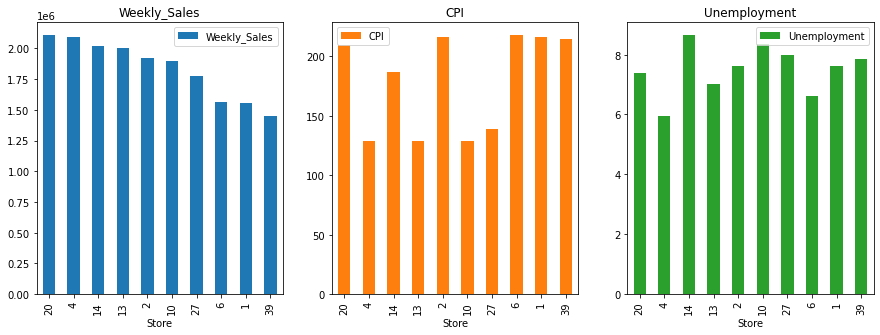

In [ ]:
#Visualizando as 10 lojas se destacam por vendas semanais "Weekly_Sales"
df1

,Weekly_Sales,CPI,Unemployment
Store,,,
20,2.107677e+06,209.038131,7.371413
4,2.094713e+06,128.679669,5.964692
14,2.020978e+06,186.285678,8.648748
13,2.003620e+06,128.679669,7.001825
2,1.925751e+06,215.646311,7.623846
10,1.899425e+06,128.679669,8.362965
27,1.775216e+06,139.011284,8.001748
6,1.564728e+06,217.553197,6.606902
1,1.555264e+06,215.996892,7.610420


5 lojas se destacam por vendas semanais "Weekly_Sales", lojas 20, 4, 14, 13 e 2 que na nossa analise é o principal fator para a expanção da loja. Vamos agora para fatores de desempate.

Vamos separar a media de vendas por ano, afim de identificar se alguma das lojas esta vindo em uma crescente de vendas durante os anos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87b66737d0>,
      dtype=object)

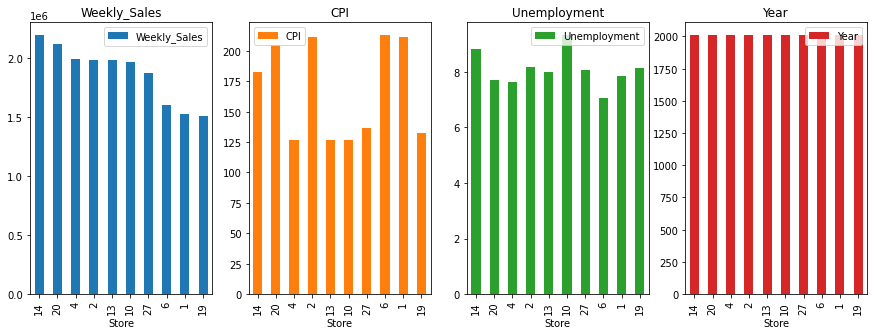

In [ ]:
#Media de vendas semanais de cada loja no ano de 2010
y2010 = df.loc[(df.Year == 2010)]
Year_2010 = y2010.drop(columns=['Date', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'Month']
              ).groupby('Store').mean(
              ).sort_values(by="Weekly_Sales", ascending = False).head(10)

Year_2010.plot(kind='bar', subplots=True, layout=(1, 4), figsize=(15,5))

In [ ]:
Year_2010

,Weekly_Sales,CPI,Unemployment,Year
Store,,,,
14,2.197130e+06,182.347598,8.821208,2010.0
20,2.119439e+06,204.521407,7.713562,2010.0
4,1.993343e+06,126.382362,7.650958,2010.0
2,1.984956e+06,210.963620,8.182521,2010.0
13,1.984849e+06,126.382362,8.008583,2010.0
10,1.968171e+06,126.382362,9.324187,2010.0
27,1.875275e+06,136.266406,8.056458,2010.0
6,1.602340e+06,212.824592,7.062812,2010.0
1,1.526642e+06,211.305760,7.860729,2010.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87b67b6790>,
      dtype=object)

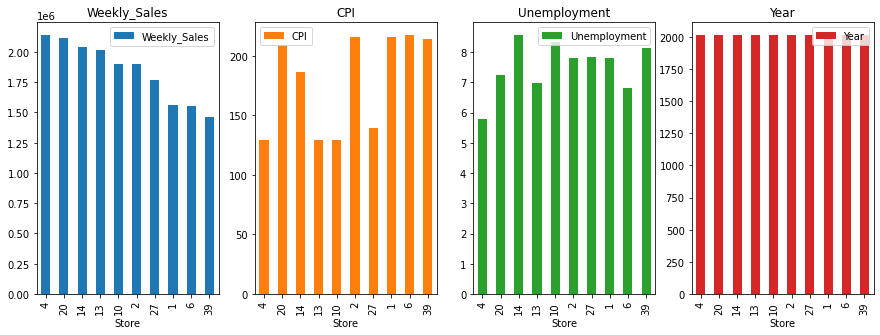

In [ ]:
#Media de vendas semanais de cada loja no ano de 2011
y2011 = df.loc[(df.Year == 2011)]
Year_2011 = y2011.drop(columns=['Date', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'Month']
              ).groupby('Store').mean(
              ).sort_values(by="Weekly_Sales", ascending = False).head(10)

Year_2011.plot(kind='bar', subplots=True, layout=(1, 4), figsize=(15,5))

In [ ]:
Year_2011

,Weekly_Sales,CPI,Unemployment,Year
Store,,,,
4,2.136390e+06,129.032297,5.794096,2011.0
20,2.112250e+06,208.727500,7.245173,2011.0
14,2.040313e+06,186.113432,8.555962,2011.0
13,2.010337e+06,129.032297,6.971596,2011.0
10,1.902248e+06,129.032297,8.332885,2011.0
2,1.896305e+06,215.299494,7.809615,2011.0
27,1.767744e+06,139.109805,7.827442,2011.0
1,1.556191e+06,215.648064,7.817231,2011.0
6,1.548630e+06,217.195441,6.798538,2011.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87b67cb110>,
      dtype=object)

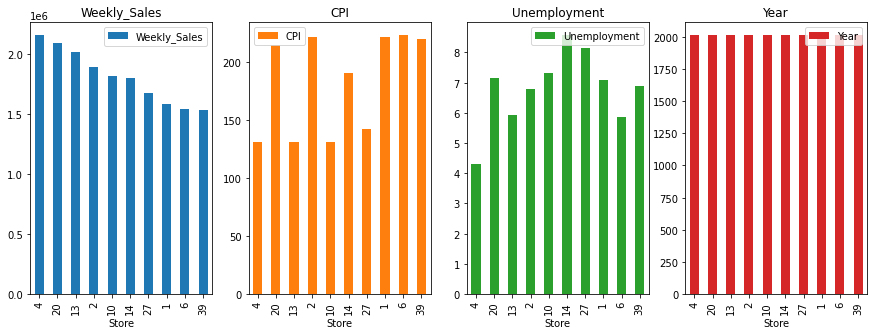

In [ ]:
#Media de vendas semanais de cada loja no ano de 2012
y2012 = df.loc[(df.Year == 2012)]
Year_2012 = y2012.drop(columns=['Date', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'Month']
              ).groupby('Store').mean(
              ).sort_values(by="Weekly_Sales", ascending = False).head(10)

Year_2012.plot(kind='bar', subplots=True, layout=(1, 4), figsize=(15,5))

In [ ]:
Year_2012

,Weekly_Sales,CPI,Unemployment,Year
Store,,,,
4,2.157470e+06,130.817673,4.288651,2012.0
20,2.089016e+06,214.455700,7.142140,2012.0
13,2.016452e+06,130.817673,5.914558,2012.0
2,1.895272e+06,221.292905,6.775558,2012.0
10,1.819270e+06,130.817673,7.326349,2012.0
14,1.800963e+06,190.889973,8.568442,2012.0
27,1.672559e+06,141.956191,8.151465,2012.0
1,1.586094e+06,221.655342,7.080907,2012.0
6,1.542210e+06,223.264275,5.866233,2012.0


agora vamos comparar a loja 20 e a loja 4, mês a mês, para saber qual esta apresentando melhor indice de desenvolvimento

#conclusão
A loja 20 tem o maior media de vendas dos anos avaliados, mas a loja 4 está ano a ano tendo um aumento nas venda semanais, isso é um indicativo de que a loja 4 vai precisar crescer para suportar a demanda, diferente das lojas 20, 14 e 20 que suas vendas estão estagnadas e até diminuindo,também percebemos que a taxa de desemprego tem uma forte presença na comparação de vendas, a taxa de desemprego vem caindo ano a ano e as vendas semanais aumentando. Ou seja, quanto menor a taxa de desemprego, maior a venda da loja 4.

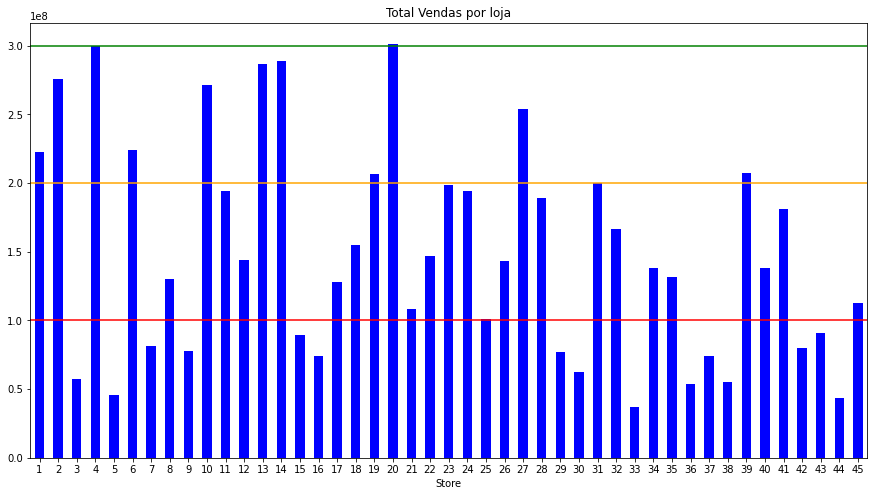

In [ ]:

plt.figure(figsize = (15,8))
sales[('Weekly_Sales', 'sum')].plot(kind = 'bar',color = 'blue')
plt.xticks(rotation = 0)
plt.title('Total Vendas por loja')
plt.axhline(y=100000000,color = 'red')
plt.axhline(y=200000000,color = 'orange')
plt.axhline(y=300000000,color = 'green')
plt.show()


